In [3]:
from catboost import CatBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Iris

In [16]:
data = datasets.load_iris()
X = data.data[:, :2]  
y = data.target
# import pandas as pd
# y = pd.get_dummies(y)
X_Train, X_Test, y_Train ,y_Test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
Model = CatBoostClassifier(learning_rate=0.05, depth=6, verbose=1,
                          task_type='GPU', save_snapshot=True, snapshot_file='SaveModel', snapshot_interval=60, random_seed=1)
Model.fit(X_Train, y_Train, eval_set=(X_Test, y_Test))

bestTest = 0.4926296234
bestIteration = 180
Shrink model to first 181 iterations.


In [23]:
Model.score(X_Test, y_Test)

0.78

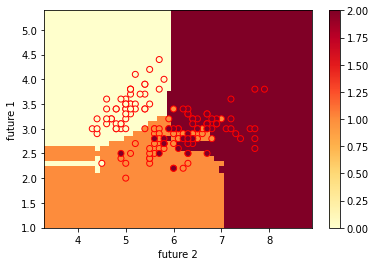

In [19]:
h=0.01
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = Model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx,yy,Z,cmap=plt.cm.YlOrRd)
plt.ylabel('future 1')
plt.xlabel('future 2')

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.YlOrRd,edgecolors="r")
plt.ylabel('future 1')
plt.xlabel('future 2')
plt.colorbar()

## mnist

In [24]:
data = datasets.load_digits()
X = data.images.reshape((len(data.images), -1))
y = data.target

X_Train, X_Test, y_Train ,y_Test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
Model = CatBoostClassifier(learning_rate=0.05, depth=6, verbose=1,
                          task_type='GPU', save_snapshot=True, snapshot_file='SaveModel1', snapshot_interval=60, random_seed=1)
Model.fit(X_Train, y_Train, eval_set=(X_Test, y_Test))

bestTest = 0.08183767017
bestIteration = 999


In [26]:
Model.score(X_Test, y_Test)

0.9797979797979798